In [1]:
import os

In [2]:
%pwd

'D:\\Desktop\\Deep Learning\\Lab 4\\Main MNSIT-MLPClassifer\\Research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'D:\\Desktop\\Deep Learning\\Lab 4\\Main MNSIT-MLPClassifer'

In [5]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import logging
from dataclasses import dataclass
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

@dataclass
class DataTransformationConfig:
    root_dir: Path
    X_train_file: Path
    y_train_file: Path
    X_test_file: Path
    y_test_file: Path

class ConfigurationManager:
    def __init__(self, config_dir):
        self.root_dir = Path(config_dir)
        self.X_train_file = self.root_dir / "dataset/Modeltraining/X_train.csv"
        self.y_train_file = self.root_dir / "dataset/Modeltraining/y_train.csv"
        self.X_test_file = self.root_dir / "dataset/Modeltraining/X_test.csv"
        self.y_test_file = self.root_dir / "dataset/Modeltraining/y_test.csv"

    def get_data_transformation_config(self) -> DataTransformationConfig:
        return DataTransformationConfig(
            root_dir=self.root_dir,
            X_train_file=self.X_train_file,
            y_train_file=self.y_train_file,
            X_test_file=self.X_test_file,
            y_test_file=self.y_test_file
        )

class DataTransformation:
    def __init__(self, config: DataTransformationConfig):
        self.config = config
        self.train_images = None
        self.train_labels = None
        self.test_images = None
        self.test_labels = None

    def load_and_preprocess_data(self):
        # Load MNIST data
        (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

        # Preprocess the data
        self.train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
        self.test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
        self.train_labels = to_categorical(train_labels)
        self.test_labels = to_categorical(test_labels)

        logging.info(f"Data loaded and preprocessed successfully.")

    def split_and_save_data(self):
        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(self.train_images, self.train_labels, test_size=0.2, random_state=42)

        # Flatten X for saving to CSV
        X_train_flat = X_train.reshape(X_train.shape[0], -1)
        X_test_flat = X_test.reshape(X_test.shape[0], -1)

        # Save the split data as CSV
        pd.DataFrame(X_train_flat).to_csv(self.config.X_train_file, index=False)
        logging.info(f"X_train data saved to {self.config.X_train_file}")
        pd.DataFrame(y_train).to_csv(self.config.y_train_file, index=False)
        logging.info(f"y_train data saved to {self.config.y_train_file}")
        pd.DataFrame(X_test_flat).to_csv(self.config.X_test_file, index=False)
        logging.info(f"X_test data saved to {self.config.X_test_file}")
        pd.DataFrame(y_test).to_csv(self.config.y_test_file, index=False)
        logging.info(f"y_test data saved to {self.config.y_test_file}")

def main():
    config_dir = Path(os.getcwd())  # Update with your root directory path
    config_manager = ConfigurationManager(config_dir)
    data_transformation_config = config_manager.get_data_transformation_config()

    data_transformation = DataTransformation(data_transformation_config)
    data_transformation.load_and_preprocess_data()
    data_transformation.split_and_save_data()

if __name__ == "__main__":
    main()

2024-02-19 14:40:56,802 - INFO - Data loaded and preprocessed successfully.
2024-02-19 14:41:09,395 - INFO - X_train data saved to D:\Desktop\Deep Learning\Lab 4\Main MNSIT-MLPClassifer\dataset\Modeltraining\X_train.csv
2024-02-19 14:41:09,527 - INFO - y_train data saved to D:\Desktop\Deep Learning\Lab 4\Main MNSIT-MLPClassifer\dataset\Modeltraining\y_train.csv
2024-02-19 14:41:12,687 - INFO - X_test data saved to D:\Desktop\Deep Learning\Lab 4\Main MNSIT-MLPClassifer\dataset\Modeltraining\X_test.csv
2024-02-19 14:41:12,746 - INFO - y_test data saved to D:\Desktop\Deep Learning\Lab 4\Main MNSIT-MLPClassifer\dataset\Modeltraining\y_test.csv


In [6]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'dataset\Modeltraining\X_train.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows (by default, it shows the first 5 rows)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


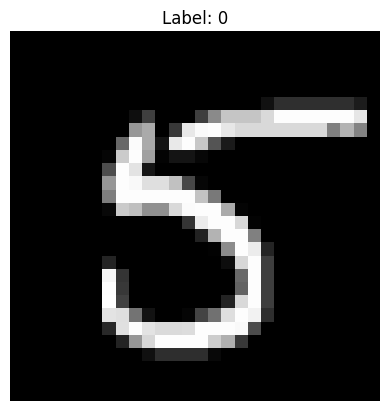

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first row of the scaled dataset
csv_file_path = 'dataset/Modeltraining/X_train.csv'
df = pd.read_csv(csv_file_path, nrows=1)

# Inverse transform the scaled row to get the original image
original_image = df.iloc[0].values.reshape(1, -1)

# Reshape and display the image
original_image = original_image.reshape(28, 28)

plt.imshow(original_image, cmap="gray")
plt.title("Label: 0")  # Replace with the actual label if available
plt.axis('off')
plt.show()


In [8]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'dataset\Modeltraining\y_train.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows (by default, it shows the first 5 rows)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
